In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Malumotlarni muvozanatga keltrib olamiz

In [ ]:
from sklearn.utils import resample


# 0 va 1 sinfdagi qatorlarni ajratamiz
df0 = df[df.Outcome == 0]
df1 = df[df.Outcome == 1]

# 0 sinfdagi qatorlarni qayta tanlab olamiz (undersampling)
df_majority_downsampled = resample(df0,
                                   replace=False,    # qayta tanlash
                                   n_samples=len(df1), # kamchilikdagi sinf soniga tenglashtirish
                                   random_state=42)  # barqaror qayta tanlash

# Qayta tanlangan va kamchilikdagi qatorlarni birlashtiramiz
df = pd.concat([df_majority_downsampled, df1])

# Muvozanatlangan ma'lumotlarni tekshiramiz
print(df.Outcome.value_counts())

Outcome
0    268
1    268
Name: count, dtype: int64


In [ ]:
df.shape

(536, 9)

In [ ]:
df.corrwith(df['Outcome']).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.488653
BMI                         0.325308
Age                         0.265398
Pregnancies                 0.219760
Insulin                     0.170363
DiabetesPedigreeFunction    0.149907
SkinThickness               0.097215
BloodPressure               0.074021
dtype: float64

Datasetni ML ga tayyorlaymiz

In [ ]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=.1,random_state=19)

Modelni oqitamiz

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=23)

eng yaxshi k ni topib olamiz

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,25)}
knn_gscv = GridSearchCV(knn,param_grid,cv=5)
knn_gscv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
knn_gscv.best_params_

{'n_neighbors': 23}

Modelni baholaymiz

In [ ]:
y_predict = knn.predict(X_test)

JACCARD INDEX

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,y_predict)

0.5517241379310345

Counfusion matrix

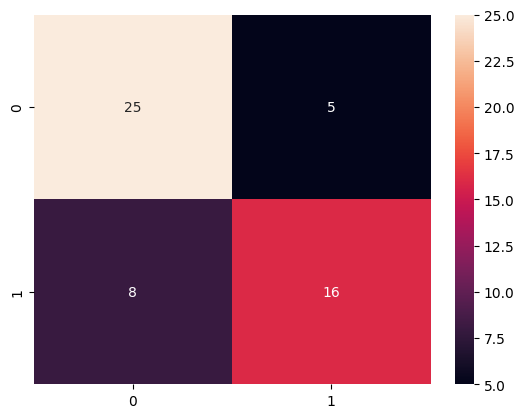

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
precision = precision_score(y_test,y_predict)
recall = recall_score(y_test,y_predict)
accuracy = accuracy_score(y_test,y_predict)
f1 = f1_score(y_test,y_predict)
print(f"Precision= {precision}\nRecall= {recall}\nAccuracy= {accuracy}\nF1= {f1}")

Precision= 0.7619047619047619
Recall= 0.6666666666666666
Accuracy= 0.7592592592592593
F1= 0.7111111111111111


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        30
           1       0.76      0.67      0.71        24

    accuracy                           0.76        54
   macro avg       0.76      0.75      0.75        54
weighted avg       0.76      0.76      0.76        54



Cross-validation yordamida tekshiramiz

In [ ]:
# cross-validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator=knn,X=X,y=y,cv=5)
#classification report
from sklearn.metrics import classification_report
print(f"Classification report:\n{classification_report(y,predict)}")

Classification report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       268
           1       0.75      0.72      0.73       268

    accuracy                           0.74       536
   macro avg       0.74      0.74      0.74       536
weighted avg       0.74      0.74      0.74       536



modelni saqlab olamiz

In [ ]:
import joblib
joblib.dump(knn,"Knn.jbl")

['Knn.jbl']